In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from ccn import Constraint, ConstraintsGroup
from shapes import HalfPlane
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Define the shapes

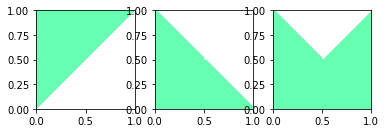

In [6]:
A = HalfPlane(1, -1, 0)
B = HalfPlane(+1, +1, -1)
C = B | -A
shapes = [A, B, C]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints = [ConstraintsGroup([Constraint('n2 :- 0 n1')])]

### Define the neural network

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 3),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=3, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

Epoch 1
-------------------------------
loss: 0.718439 [    0/10000]
loss: 0.451589 [ 6400/10000]
Test Error: 
 Accuracy: 91.9%, 88.9%, 89.1%
 Avg loss: 0.005388 

Epoch 2
-------------------------------
loss: 0.317696 [    0/10000]
loss: 0.174249 [ 6400/10000]
Test Error: 
 Accuracy: 97.9%, 98.7%, 98.7%
 Avg loss: 0.002715 

Epoch 3
-------------------------------
loss: 0.170848 [    0/10000]
loss: 0.106305 [ 6400/10000]
Test Error: 
 Accuracy: 98.6%, 99.0%, 98.8%
 Avg loss: 0.001968 

Epoch 4
-------------------------------
loss: 0.123427 [    0/10000]
loss: 0.079503 [ 6400/10000]
Test Error: 
 Accuracy: 98.9%, 99.1%, 98.9%
 Avg loss: 0.001586 

Epoch 5
-------------------------------
loss: 0.098120 [    0/10000]
loss: 0.064644 [ 6400/10000]
Test Error: 
 Accuracy: 99.1%, 99.0%, 98.8%
 Avg loss: 0.001343 

Epoch 6
-------------------------------
loss: 0.081673 [    0/10000]
loss: 0.055128 [ 6400/10000]
Test Error: 
 Accuracy: 99.1%, 99.2%, 98.9%
 Avg loss: 0.001171 

Epoch 7
--------

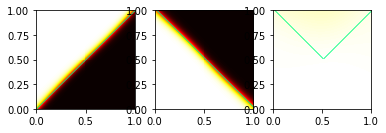

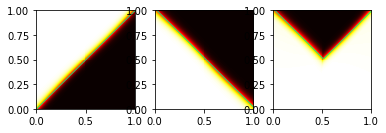

In [8]:
experiment = Experiment('halfplanes', model, shapes, constraints)
experiment.run(500)
experiment.save(dir='./models/')